<a href="https://colab.research.google.com/github/sarisppp/PJ63_CE18/blob/master/test_paramitorv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import MinMaxScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<class 'pandas.core.frame.DataFrame'>
Index: 55620 entries, 30/08/19 10:38:00 to 20/08/20 16:46:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SET50.Close   55620 non-null  float64
 1   EMAV(34)      55620 non-null  float64
 2   RSI(14)       55620 non-null  float64
 3   MACD(13,5,5)  55620 non-null  float64
 4   Signal        55620 non-null  float64
 5   EMAV(RSI,13)  55620 non-null  float64
dtypes: float64(6)
memory usage: 3.0+ MB


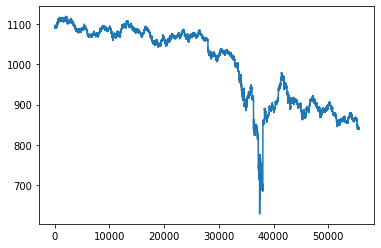

In [49]:
used_features = ['Timestamp','SET50.Close','EMAV(34)','RSI(14)','EMAV(RSI,13)','MACD(13,5,5)','Signal']
data = pd.read_excel("/content/drive/My Drive/set50.xlsx",usecols =used_features)
data.set_index("Timestamp",inplace=True)
data.info()
data=data.dropna()
plt.plot(data['SET50.Close'].values)


In [50]:
def signal(data,periods=16):
  data['output']=0
  for index,row in data.iterrows():
    if row['MACD(13,5,5)']>row['Signal'] and row['RSI(14)']>row['EMAV(RSI,13)'] and row['RSI(14)']<70:
      signalPre=1
    elif row['MACD(13,5,5)']<row['Signal'] and row['RSI(14)']<row['EMAV(RSI,13)'] and row['RSI(14)']>30:
      if row['SET50.Close']<row['EMAV(34)']:
        signalPre=-1
      else:
        signalPre=0
    else:
      signalPre=0
    data.at[index,'output']= signalPre
    
     
  return data

In [51]:
data_new=data
data_new=signal(data_new)
data_new.info()

    

<class 'pandas.core.frame.DataFrame'>
Index: 55620 entries, 30/08/19 10:38:00 to 20/08/20 16:46:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SET50.Close   55620 non-null  float64
 1   EMAV(34)      55620 non-null  float64
 2   RSI(14)       55620 non-null  float64
 3   MACD(13,5,5)  55620 non-null  float64
 4   Signal        55620 non-null  float64
 5   EMAV(RSI,13)  55620 non-null  float64
 6   output        55620 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 5.9+ MB


In [52]:
data_new['buy']=0
data_new['sell']=0
data_new['status']=0
data_new['Alert']=0
data_new=data_new.astype(float)
status=0
for index,row in data_new.iterrows():
  if status==0:
      if row['output']==1:
        status=1
        close=row['SET50.Close']
        buy=0
        sell=0
        Alert=1
      elif row['output']==-1:
        status=-1
        close=row['SET50.Close']
        buy=0
        sell=0
        Alert=-1
      else:
        status=0
        buy=0
        sell=0
        Alert=0
  else :
    if status==1:
      if row['output']==1:
        buy=0
        sell=0
        Alert=0
      elif row['output']==-1:
        status=-1
        sell=row['SET50.Close']-close
        close=row['SET50.Close']
        buy=0
        Alert=-1
      else:
        buy=0
        sell=0
        Alert=0
    elif status==-1:
       if row['output']==1:
        status=1
        buy=close-row['SET50.Close']
        close=row['SET50.Close']
        sell=0
        Alert=1
       elif row['output']==-1:
        buy=0
        sell=0
        Alert=0
       else:
        buy=0
        sell=0
        Alert=0
    else:
      buy=0
      sell=0
  data_new.at[index,'buy']=buy
  data_new.at[index,'sell']=sell
  data_new.at[index,'status']=status
  data_new.at[index,'Alert']=Alert

In [53]:
data_new.info()
data_new
from google.colab import files
data_new.to_csv('filename.csv') 
files.download('filename.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 55620 entries, 30/08/19 10:38:00 to 20/08/20 16:46:00
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SET50.Close   55620 non-null  float64
 1   EMAV(34)      55620 non-null  float64
 2   RSI(14)       55620 non-null  float64
 3   MACD(13,5,5)  55620 non-null  float64
 4   Signal        55620 non-null  float64
 5   EMAV(RSI,13)  55620 non-null  float64
 6   output        55620 non-null  float64
 7   buy           55620 non-null  float64
 8   sell          55620 non-null  float64
 9   status        55620 non-null  float64
 10  Alert         55620 non-null  float64
dtypes: float64(11)
memory usage: 7.6+ MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

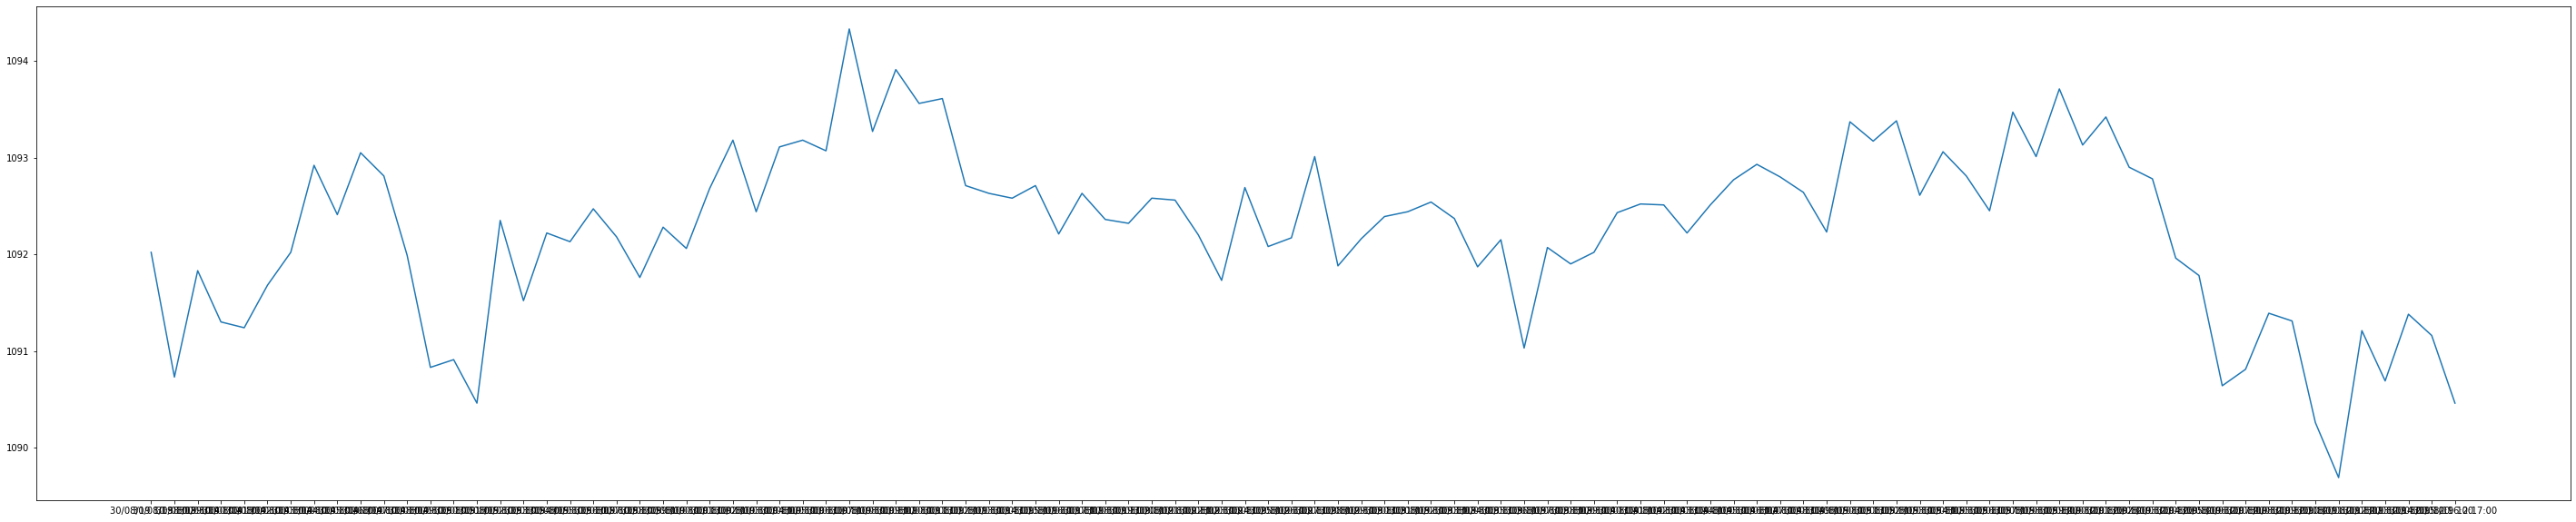

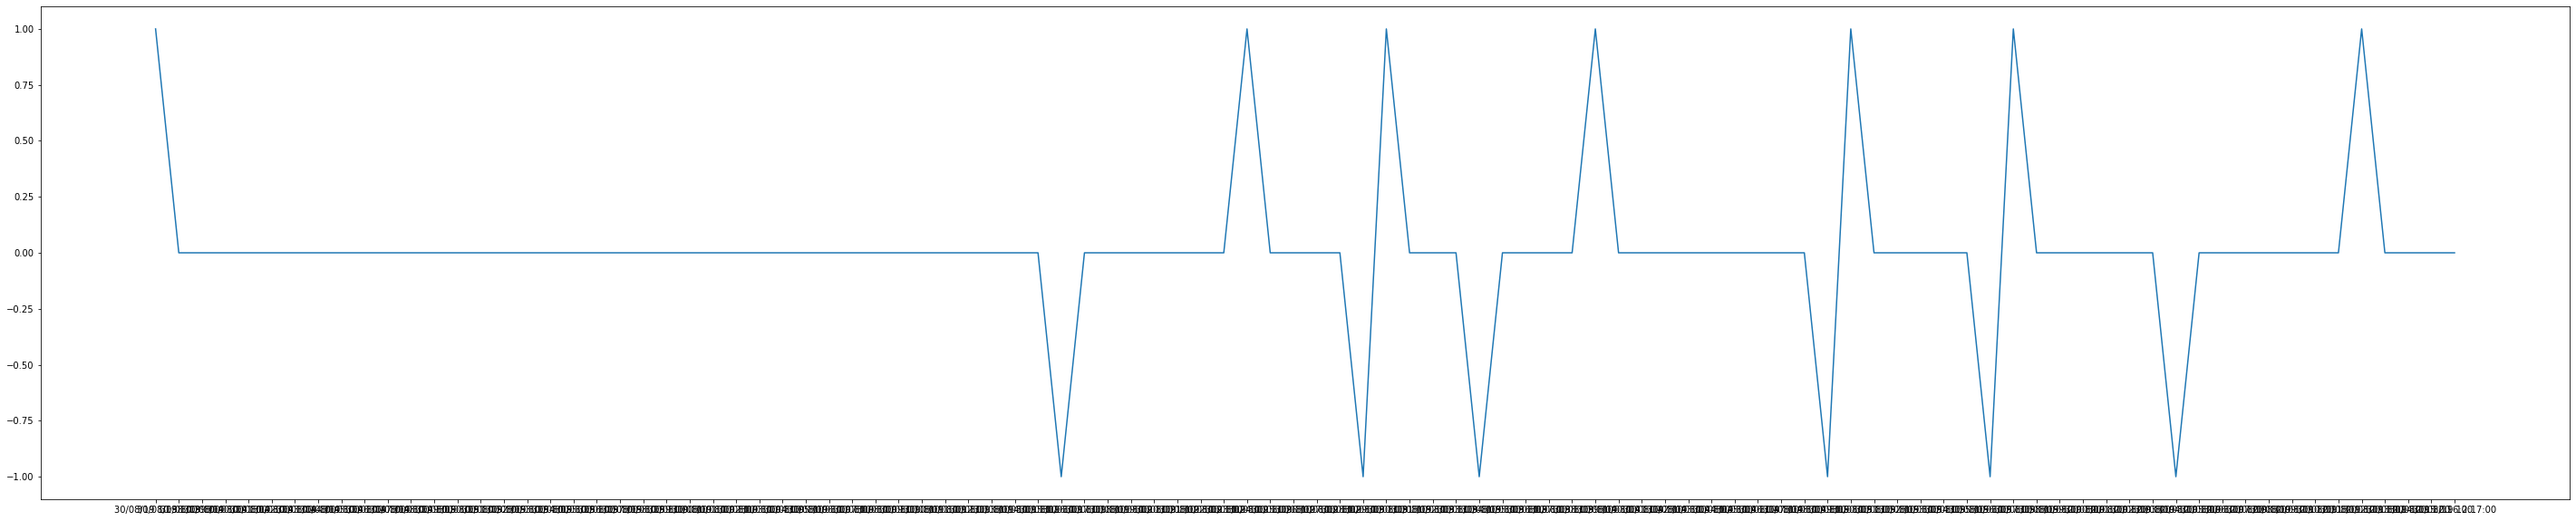

In [71]:
plt.figure(figsize=(50,10))
plt.plot(data_new['SET50.Close'].head(100))
plt.show()
plt.figure(figsize=(50,10))
plt.plot(data_new['Alert'].head(100))
plt.show()